In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
# Import the pyspark modules
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[3]") \
.appName('CIS4130') \
.getOrCreate()

22/12/16 19:56:36 WARN Utils: Your hostname, Hangs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.80.71.211 instead (on interface en0)
22/12/16 19:56:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/16 19:56:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#Read csv file
df = spark.read.csv("/metadata.csv",  header=True, inferSchema=True)

In [106]:
df.printSchema()

root
 |-- cord_uid: string (nullable = true)
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- mag_id: string (nullable = true)
 |-- who_covidence_id: string (nullable = true)
 |-- arxiv_id: string (nullable = true)
 |-- pdf_json_files: string (nullable = true)
 |-- pmc_json_files: string (nullable = true)
 |-- url: string (nullable = true)
 |-- s2_id: string (nullable = true)
 |-- wordCount_title: integer (nullable = false)
 |-- wordCount_abstract: integer (nullable = false)



In [107]:
df.show()

+--------+--------------------+--------+--------------------+--------------------+---------+---------+---------+--------------------+------------+--------------------+--------------------+------+----------------+--------+--------------------+--------------------+--------------------+-----+---------------+------------------+
|cord_uid|                 sha|source_x|               title|                 doi|    pmcid|pubmed_id|  license|            abstract|publish_time|             authors|             journal|mag_id|who_covidence_id|arxiv_id|      pdf_json_files|      pmc_json_files|                 url|s2_id|wordCount_title|wordCount_abstract|
+--------+--------------------+--------+--------------------+--------------------+---------+---------+---------+--------------------+------------+--------------------+--------------------+------+----------------+--------+--------------------+--------------------+--------------------+-----+---------------+------------------+
|ug7v899j|d1aafb70c066

In [4]:
#Show the columns
df.columns

['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [5]:
#Count Columns
cols = len(df.columns)
print(cols)

19


In [6]:
#Count rows
df.count()

11639

In [7]:
#Import Libraries
import pyspark.sql.functions as F

In [8]:
#Count words in Title column
df = df.withColumn('wordCount_title', F.size(F.split(F.col('title'), ' ')))
df.select('title', 'wordCount_title').show()

+--------------------+---------------+
|               title|wordCount_title|
+--------------------+---------------+
|Clinical features...|             15|
|Nitric oxide: a p...|              8|
|Surfactant protei...|              6|
|Role of endotheli...|              6|
|Gene expression i...|             10|
|Sequence requirem...|             12|
|Debate: Transfusi...|             10|
|The 21st Internat...|             15|
|Heme oxygenase-1 ...|              8|
|Technical Descrip...|             10|
|Conservation of p...|             11|
|Heterogeneous nuc...|             11|
|A Method to Ident...|              9|
|Vaccinia virus in...|              9|
|The site of origi...|             14|
|Multi-faceted, mu...|             12|
|Herpes simplex vi...|             21|
|Logistics of comm...|             15|
|Protection of pul...|             12|
|Bioinformatic map...|              8|
+--------------------+---------------+
only showing top 20 rows



In [9]:
#Count words in abstrac column
df = df.withColumn('wordCount_abstract', F.size(F.split(F.col('abstract'), ' ')))
df.select('abstract', 'wordCount_abstract').show()

+--------------------+------------------+
|            abstract|wordCount_abstract|
+--------------------+------------------+
|OBJECTIVE: This r...|               262|
|Inflammatory dise...|               142|
|Surfactant protei...|               219|
|Endothelin-1 (ET-...|                68|
|Respiratory syncy...|               110|
|Nidovirus subgeno...|               174|
|Recent evidence s...|               113|
|The 21st Internat...|                83|
|Heme oxygenase-1 ...|               188|
|This report descr...|               189|
|Regulation of orn...|               117|
|Heterogeneous nuc...|               174|
|The UBA domain is...|               110|
|We examined the r...|               150|
|                null|                -1|
|There are hundred...|               219|
|INTRODUCTION: The...|               139|
|BACKGROUND: Previ...|               251|
|BACKGROUND: Oxyge...|               238|
|BACKGROUND: AlkB-...|               255|
+--------------------+------------

In [10]:
#Import Library
from pyspark.sql.functions import col, isnan, when, count, udf

In [11]:
#Find Null values in each column
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+--------+----+--------+-----+---+-----+---------+-------+--------+------------+-------+-------+------+----------------+--------+--------------+--------------+---+-----+---------------+------------------+
|cord_uid| sha|source_x|title|doi|pmcid|pubmed_id|license|abstract|publish_time|authors|journal|mag_id|who_covidence_id|arxiv_id|pdf_json_files|pmc_json_files|url|s2_id|wordCount_title|wordCount_abstract|
+--------+----+--------+-----+---+-----+---------+-------+--------+------------+-------+-------+------+----------------+--------+--------------+--------------+---+-----+---------------+------------------+
|       0|1264|       0|    0|  0|    0|        0|      0|    2504|           2|    708|     81| 11606|           11608|   11609|          1271|          3708| 13|11618|              0|                 0|
+--------+----+--------+-----+---+-----+---------+-------+--------+------------+-------+-------+------+----------------+--------+--------------+--------------+---+-----+-----------

In [12]:
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date
 
df1 = df.withColumn('year',year(df.publish_time))
df1.show()

+--------+--------------------+--------+--------------------+--------------------+---------+---------+---------+--------------------+------------+--------------------+--------------------+------+----------------+--------+--------------------+--------------------+--------------------+-----+---------------+------------------+----+
|cord_uid|                 sha|source_x|               title|                 doi|    pmcid|pubmed_id|  license|            abstract|publish_time|             authors|             journal|mag_id|who_covidence_id|arxiv_id|      pdf_json_files|      pmc_json_files|                 url|s2_id|wordCount_title|wordCount_abstract|year|
+--------+--------------------+--------+--------------------+--------------------+---------+---------+---------+--------------------+------------+--------------------+--------------------+------+----------------+--------+--------------------+--------------------+--------------------+-----+---------------+------------------+----+
|ug7v89

In [13]:
#Select columns
df2 = df1[['title','abstract','year']]
df2.show()

+--------------------+--------------------+----+
|               title|            abstract|year|
+--------------------+--------------------+----+
|Clinical features...|OBJECTIVE: This r...|2001|
|Nitric oxide: a p...|Inflammatory dise...|2000|
|Surfactant protei...|Surfactant protei...|2000|
|Role of endotheli...|Endothelin-1 (ET-...|2001|
|Gene expression i...|Respiratory syncy...|2001|
|Sequence requirem...|Nidovirus subgeno...|2001|
|Debate: Transfusi...|Recent evidence s...|2001|
|The 21st Internat...|The 21st Internat...|2001|
|Heme oxygenase-1 ...|Heme oxygenase-1 ...|2003|
|Technical Descrip...|This report descr...|2003|
|Conservation of p...|Regulation of orn...|2000|
|Heterogeneous nuc...|Heterogeneous nuc...|2000|
|A Method to Ident...|The UBA domain is...|2003|
|Vaccinia virus in...|We examined the r...|2000|
|The site of origi...|                null|2004|
|Multi-faceted, mu...|There are hundred...|2004|
|Herpes simplex vi...|INTRODUCTION: The...|2004|
|Logistics of comm..

In [14]:
#Find Null Value in title and abstract columns
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns]).show()

+-----+--------+----+
|title|abstract|year|
+-----+--------+----+
|    0|    2504|  33|
+-----+--------+----+



In [15]:
#Drop Null
df2 = df2.na.drop(subset=["title", "abstract","year"])

In [16]:
df2.count()

9102

In [17]:
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns]).show()

+-----+--------+----+
|title|abstract|year|
+-----+--------+----+
|    0|       0|   0|
+-----+--------+----+



In [18]:
#Combine title+abstract column to a new column
from pyspark.sql import functions as sf
 
df3=df2.withColumn('text', sf.concat(sf.col('title'),sf.lit(' '),sf.col('abstract')))
df3.show()

+--------------------+--------------------+----+--------------------+
|               title|            abstract|year|                text|
+--------------------+--------------------+----+--------------------+
|Clinical features...|OBJECTIVE: This r...|2001|Clinical features...|
|Nitric oxide: a p...|Inflammatory dise...|2000|Nitric oxide: a p...|
|Surfactant protei...|Surfactant protei...|2000|Surfactant protei...|
|Role of endotheli...|Endothelin-1 (ET-...|2001|Role of endotheli...|
|Gene expression i...|Respiratory syncy...|2001|Gene expression i...|
|Sequence requirem...|Nidovirus subgeno...|2001|Sequence requirem...|
|Debate: Transfusi...|Recent evidence s...|2001|Debate: Transfusi...|
|The 21st Internat...|The 21st Internat...|2001|The 21st Internat...|
|Heme oxygenase-1 ...|Heme oxygenase-1 ...|2003|Heme oxygenase-1 ...|
|Technical Descrip...|This report descr...|2003|Technical Descrip...|
|Conservation of p...|Regulation of orn...|2000|Conservation of p...|
|Heterogeneous nuc..

In [19]:
from pyspark.sql.types import *
import re

In [20]:
def cleanText(txt):
    txt = re.sub('[^A-Za-z]+', ' ', txt)
    return txt

In [21]:
udfCleanText = udf(cleanText, StringType())
df_cleaned=df3.withColumn('text_cleaned', udfCleanText('text'))
df_cleaned.select('text','text_cleaned').show(5)

+--------------------+--------------------+
|                text|        text_cleaned|
+--------------------+--------------------+
|Clinical features...|Clinical features...|
|Nitric oxide: a p...|Nitric oxide a pr...|
|Surfactant protei...|Surfactant protei...|
|Role of endotheli...|Role of endotheli...|
|Gene expression i...|Gene expression i...|
+--------------------+--------------------+
only showing top 5 rows



In [22]:
#Import libraries and transform data with tokenizer
from pyspark.ml.feature import Tokenizer, StopWordsRemover

tokenizer = Tokenizer(inputCol="text_cleaned", outputCol="words")
words_df = tokenizer.transform(df_cleaned)

In [23]:
#Data Cleaning with stop words
stop_words = StopWordsRemover(inputCol="words", outputCol="words_filtered")
filtered_words_df = stop_words.transform(words_df)

22/12/16 19:56:58 WARN StopWordsRemover: Default locale set was [en_VN]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


In [24]:
filtered_words_df.show()

22/12/16 19:57:10 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 23 (TID 30): Attempting to kill Python Worker
+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+
|               title|            abstract|year|                text|        text_cleaned|               words|      words_filtered|
+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+
|Clinical features...|OBJECTIVE: This r...|2001|Clinical features...|Clinical features...|[clinical, featur...|[clinical, featur...|
|Nitric oxide: a p...|Inflammatory dise...|2000|Nitric oxide: a p...|Nitric oxide a pr...|[nitric, oxide, a...|[nitric, oxide, p...|
|Surfactant protei...|Surfactant protei...|2000|Surfactant protei...|Surfactant protei...|[surfactant, prot...|[surfactant, prot...|
|Role of endotheli...|Endothelin-1 (ET-...|2001|Role of endothe

In [25]:
#Define function for text_cleaned column
def getCleanText(filteredText):
    return ' '.join(filteredText)

In [26]:
#Create a new column named text_cleaned
udfCleanText = udf(getCleanText, StringType())
dfFilteredCleaned = filtered_words_df.withColumn('Text', udfCleanText('words_filtered'))
dfFilteredCleaned.select('Text').show(5)


22/12/16 19:57:23 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 24 (TID 31): Attempting to kill Python Worker
+--------------------+
|                Text|
+--------------------+
|clinical features...|
|nitric oxide pro ...|
|surfactant protei...|
|role endothelin l...|
|gene expression e...|
+--------------------+
only showing top 5 rows



In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
#Define function for Sentiment Score
def getSentimentScore(Text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(Text)
    return float(vs['compound'])

In [29]:
#Create a new column name Sentiment Score
udfSentimentScore = udf(getSentimentScore, FloatType())
dfSentimentScore = dfFilteredCleaned.withColumn('sentimentScore', udfSentimentScore('Text'))
dfSentimentScore.select('Text','sentimentScore').show(5)

22/12/16 19:57:54 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 25 (TID 32): Attempting to kill Python Worker
+--------------------+--------------+
|                Text|sentimentScore|
+--------------------+--------------+
|clinical features...|       -0.8779|
|nitric oxide pro ...|       -0.7717|
|surfactant protei...|        0.2732|
|role endothelin l...|          0.34|
|gene expression e...|        0.4939|
+--------------------+--------------+
only showing top 5 rows



In [32]:
df_pandas = dfSentimentScore.toPandas()

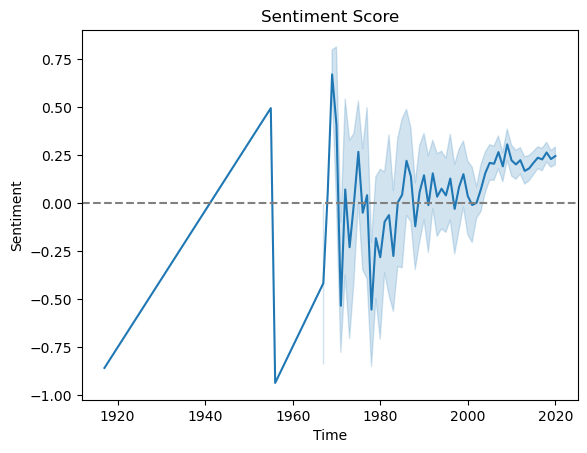

In [41]:
# Lineplot
import seaborn as sns
g = sns.lineplot(x=df_pandas['year'], y=df_pandas['sentimentScore'])

g.set(title='Sentiment Score')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey');

In [104]:
x = df_pandas.groupby('year')['Text'].count().sort_values().tail(15)
x.head()

year
2006    242
2002    252
2009    254
2010    327
2008    331
Name: Text, dtype: int64

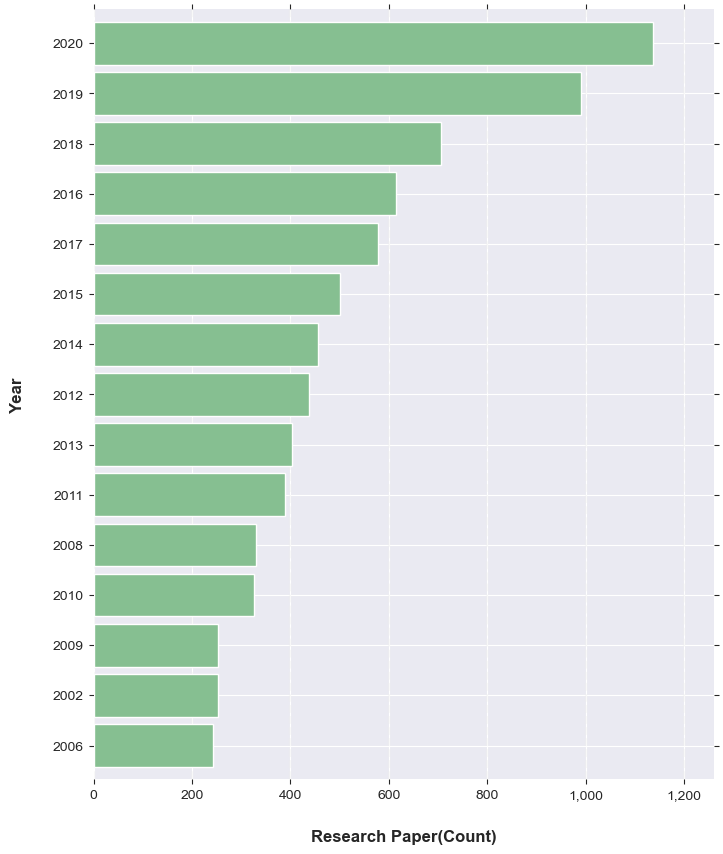

In [105]:
from matplotlib.ticker import StrMethodFormatter
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Research Paper(Count)", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Year", labelpad=20, weight='bold', size=12)
# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [36]:
#Define function that return 0 if sentiment score <0 and 1 if sentiment score >1
def condition(r):
    if r > 0:
        return 1
    else:
        return 0
sentiment_udf = udf(lambda x: condition(x), StringType())

df4 = dfSentimentScore.withColumn('Sentiment',sentiment_udf(dfSentimentScore['sentimentScore']))
df4.select('Text', 'sentimentScore', 'Sentiment').show()

22/12/16 20:06:45 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 27 (TID 36): Attempting to kill Python Worker
+--------------------+--------------+---------+
|                Text|sentimentScore|Sentiment|
+--------------------+--------------+---------+
|clinical features...|       -0.8779|        0|
|nitric oxide pro ...|       -0.7717|        0|
|surfactant protei...|        0.2732|        1|
|role endothelin l...|          0.34|        1|
|gene expression e...|        0.4939|        1|
|sequence requirem...|        0.7717|        1|
|debate transfusin...|          0.91|        1|
|st international ...|        0.9578|        1|
|heme oxygenase ca...|       -0.9255|        0|
|technical descrip...|        0.5423|        1|
|conservation poly...|          -0.0|        0|
|heterogeneous nuc...|         -0.91|        0|
|method identify p...|        0.9118|        1|
|vaccinia virus in...|        0.8481|        1|
|multi faceted mul...|        0.6597|        

In [39]:
df5 = df4.selectExpr("Text as text", "Sentiment as label")
df5 = df5.withColumn("label", df5["label"].cast(DoubleType()))

In [40]:
from pyspark.sql.functions import monotonically_increasing_id
# Create Unique ID
df6 = df5.withColumn("ID", monotonically_increasing_id())
df6.show(10)

22/12/16 20:08:26 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 28 (TID 37): Attempting to kill Python Worker
+--------------------+-----+---+
|                text|label| ID|
+--------------------+-----+---+
|clinical features...|  0.0|  0|
|nitric oxide pro ...|  0.0|  1|
|surfactant protei...|  1.0|  2|
|role endothelin l...|  1.0|  3|
|gene expression e...|  1.0|  4|
|sequence requirem...|  1.0|  5|
|debate transfusin...|  1.0|  6|
|st international ...|  1.0|  7|
|heme oxygenase ca...|  0.0|  8|
|technical descrip...|  1.0|  9|
+--------------------+-----+---+
only showing top 10 rows



In [42]:
df_score=df6.groupBy('label').count().toPandas()
df_score

,label,count
0,0.0,3485
1,1.0,5617


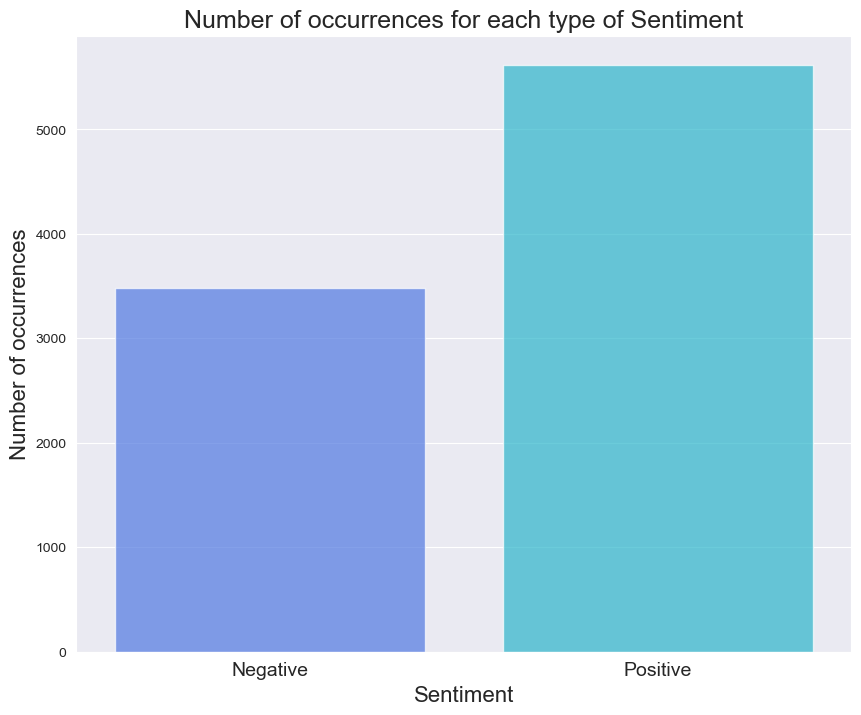

In [44]:
import matplotlib.pyplot as plt
import numpy as np
sentimentsList=['Negative','Positive']
sns.set_style('darkgrid')
sns.set_palette('rainbow')
plt.figure(figsize=(10,8))
sns.barplot(x='label', y='count',data=df_score, alpha=0.7)
plt.title('Number of occurrences for each type of Sentiment',fontsize=18)
plt.xticks(np.arange(2),sentimentsList)
plt.setp(plt.gca().get_xticklabels(), fontsize=14)
plt.xlabel('Sentiment',fontsize=16)
plt.ylabel('Number of occurrences',fontsize=16)
plt.show()

In [45]:
cleaned_text_RDD_list = df6.select('text').collect()
cleaned_text_list = [row.text for row in cleaned_text_RDD_list]
wordList = []
for text in cleaned_text_list:
     wordList.append(text.split(' '))
all_words = [word for subList in wordList for word in subList]
'''
Remove empty strings
'''
all_words = list(filter(None, all_words))

In [50]:
import nltk
all_words=set(all_words)
frequencyDistribution = nltk.FreqDist(all_words)
sorted(frequencyDistribution,key=frequencyDistribution.__getitem__, reverse=True)[0:10]

['trifluoromethyl',
 'hepc',
 'osipov',
 'sourced',
 'compressing',
 'immunomic',
 'loew',
 'smokers',
 'hammami',
 'lundborg']

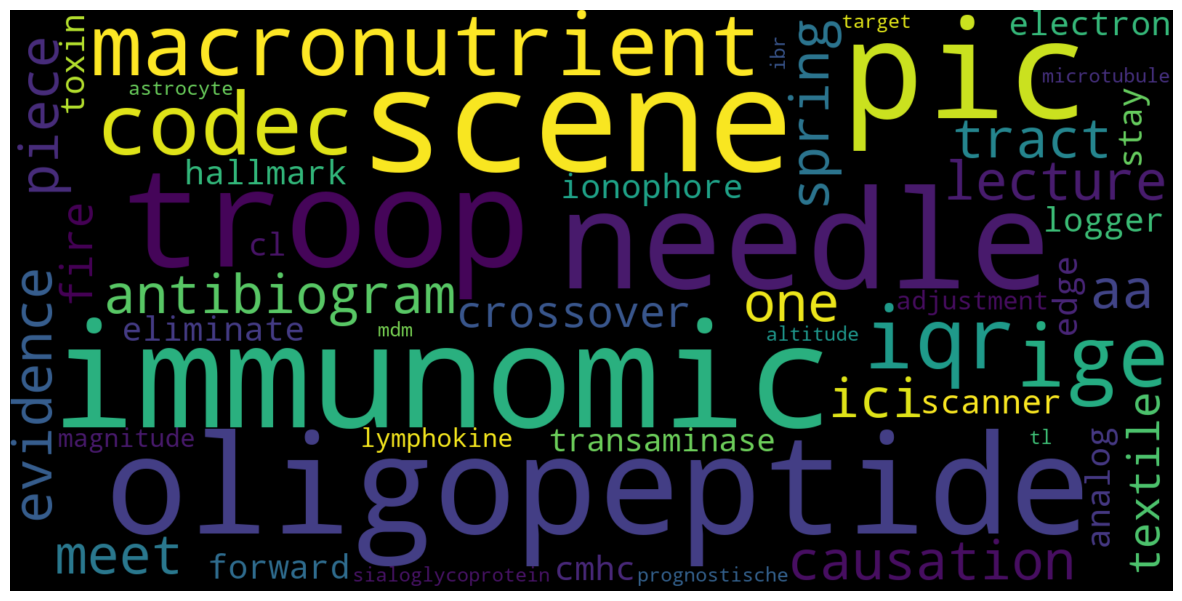

In [51]:
getWordCloud(all_words,'black')

In [48]:
from wordcloud import WordCloud, STOPWORDS
def getWordCloud(wordList,color):
    stopWords = set(STOPWORDS)
    allWords = ' '.join([word for word in wordList])
    wordCloud = WordCloud(background_color=color,
                          stopwords=stopWords,
                          width=1600,
                          height=800,
                          random_state=21,
                          max_words=50,
                          max_font_size=200).generate(allWords)
    
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(wordCloud, interpolation='bilinear');

In [84]:
#Select 3 columns for prediction
data = df6.select('ID','text','label')
data.show(10)

22/12/16 21:12:01 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 41 (TID 59): Attempting to kill Python Worker
+---+--------------------+-----+
| ID|                text|label|
+---+--------------------+-----+
|  0|clinical features...|  0.0|
|  1|nitric oxide pro ...|  0.0|
|  2|surfactant protei...|  1.0|
|  3|role endothelin l...|  1.0|
|  4|gene expression e...|  1.0|
|  5|sequence requirem...|  1.0|
|  6|debate transfusin...|  1.0|
|  7|st international ...|  1.0|
|  8|heme oxygenase ca...|  0.0|
|  9|technical descrip...|  1.0|
+---+--------------------+-----+
only showing top 10 rows



In [85]:
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF

In [86]:
from pyspark.ml import Pipeline

In [87]:
# Doing tokenizer, hashtf, and idf
tokenizer = RegexTokenizer(inputCol="text", outputCol="words", pattern="\\w+", gaps=False)
hashtf = HashingTF(numFeatures=5000, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) 

In [88]:
#Create pipeline and fit train_data into pipeline
pipeline = Pipeline(stages=[tokenizer, hashtf, idf])
pipelineFit = pipeline.fit(data).transform(data)
pipelineFit.show(10)

22/12/16 21:12:20 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 43 (TID 63): Attempting to kill Python Worker
+---+--------------------+-----+--------------------+--------------------+--------------------+
| ID|                text|label|               words|                  tf|            features|
+---+--------------------+-----+--------------------+--------------------+--------------------+
|  0|clinical features...|  0.0|[clinical, featur...|(5000,[1,32,89,14...|(5000,[1,32,89,14...|
|  1|nitric oxide pro ...|  0.0|[nitric, oxide, p...|(5000,[7,42,67,13...|(5000,[7,42,67,13...|
|  2|surfactant protei...|  1.0|[surfactant, prot...|(5000,[19,63,102,...|(5000,[19,63,102,...|
|  3|role endothelin l...|  1.0|[role, endothelin...|(5000,[41,130,554...|(5000,[41,130,554...|
|  4|gene expression e...|  1.0|[gene, expression...|(5000,[78,205,206...|(5000,[78,205,206...|
|  5|sequence requirem...|  1.0|[sequence, requir...|(5000,[194,282,35...|(5000,[194,282,35..

In [89]:
from pyspark.ml.classification import LogisticRegression
# Split the data into training and test sets
train_data, test_data = pipelineFit.randomSplit([0.7, 0.3], seed=1234)
# Create a LogisticRegression Estimator
lr = LogisticRegression()
# Fit the model to the training data
model = lr.fit(train_data)
# Show model coefficients and intercept
print("Coefficients: ", model.coefficients)
print("Intercept: ", model.intercept)
# Test the model on the testData
test_results = model.transform(test_data)

22/12/16 21:12:55 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


22/12/16 21:13:09 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/12/16 21:13:09 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


22/12/16 21:13:28 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/12/16 21:13:28 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
Coefficients:  [0.9489092396433986,4.213390015383218,-0.17210486796621516,-0.49082297624588245,-1.4278048182588507,0.9950866093836254,-1.2476048065355445,-0.8008363466968945,-0.40907008034711717,-1.3801399846084978,-1.6607054133307353,0.22902268196648395,-0.5481340807962883,0.1100687347722069,-1.439527918335889,-0.08111126073361605,0.7443570211744841,0.6197986329770248,-0.4569994432302455,-0.24640830793545188,-1.5761587520794338,-2.8997413967459633,-1.4594485505363286,0.20354369072665454,-0.4148686507080987,-2.5286458808291052,0.14311067812287467,-0.735486290273467,0.7847452416574036,-1.182272653478622,-0.3668758912842235,-0.024593065545853755,0.2544833140830548,-0.5417279200696005,1.4328075804069973,-3.420155571528258,2.661685610990059,-0.07631459920845668,-0.9695215003780212,-

In [90]:
# Show the test results
test_results.select('rawPrediction','probability','prediction','label').show(truncate=False)

+----------------------------------------+-------------------------------------------+----------+-----+
|rawPrediction                           |probability                                |prediction|label|
+----------------------------------------+-------------------------------------------+----------+-----+
|[22.572494221718202,-22.572494221718202]|[0.9999999998426414,1.573585706182712E-10] |0.0       |0.0  |
|[29.86347214301516,-29.86347214301516]  |[0.9999999999998928,1.0724754417879012E-13]|0.0       |0.0  |
|[-10.138479665795526,10.138479665795526]|[3.952729176547261E-5,0.9999604727082345]  |1.0       |1.0  |
|[-51.39066237879558,51.39066237879558]  |[4.800858519104806E-23,1.0]                |1.0       |1.0  |
|[17.857942549424195,-17.857942549424195]|[0.9999999824452729,1.7554727116397828E-8] |0.0       |0.0  |
|[-30.13058787846282,30.13058787846282]  |[8.212056862524251E-14,0.9999999999999178] |1.0       |0.0  |
|[54.415899586024594,-54.415899586024594]|[1.0,0.0]             

In [91]:
# Show the confusion matrix
test_results.groupby('label').pivot('prediction').count().show()

+-----+---+----+
|label|0.0| 1.0|
+-----+---+----+
|  0.0|656| 363|
|  1.0|458|1210|
+-----+---+----+



In [92]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [93]:
# Create a BinaryClassificationEvaluator to evaluate how well the model works
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
# Create the parameter grid (empty for now)
grid = ParamGridBuilder().build()
# Create the CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator, numFolds=3 )
# Use the CrossValidator to Fit the training data
cv = cv.fit(train_data)
# Show the average performance over the three folds
cv.avgMetrics

[0.7117088884432589]

In [94]:
# Evaluate the test data using the cross-validator model
evaluator.evaluate(cv.transform(test_data))

0.7487262398128599

In [95]:
# Create a grid to hold hyperparameters
grid = ParamGridBuilder()
grid = grid.addGrid(lr.regParam, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] )
grid = grid.addGrid(lr.elasticNetParam, [0, 1])
# Build the grid
grid = grid.build()
print('Number of models to be tested: ', len(grid))
# Create the CrossValidator using the new hyperparameter grid
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator)
# Call cv.fit() to create models with all of the combinations of parameters in the grid
all_models = cv.fit(train_data)
print("Average Metrics for Each model: ", all_models.avgMetrics)

Number of models to be tested:  12


Average Metrics for Each model:  [0.7117062395959736, 0.7117066523666479, 0.7577297369883683, 0.5, 0.7615803486552952, 0.5, 0.7629439485421715, 0.5, 0.7633162434099853, 0.5, 0.7631911484511579, 0.5]


In [96]:
# Gather the metrics and parameters of the model with the best average metrics
hyperparams = all_models.getEstimatorParamMaps()[np.argmax(all_models.avgMetrics)]
# Print out the list of hyperparameters for the best model
for i in range(len(hyperparams.items())):
    print([x for x in hyperparams.items()][i])
# Choose the best model
bestModel = all_models.bestModel
print("Area under ROC curve:", bestModel.summary.areaUnderROC)

(Param(parent='LogisticRegression_ee1618834f42', name='regParam', doc='regularization parameter (>= 0).'), 0.8)
(Param(parent='LogisticRegression_ee1618834f42', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'), 0.0)


Area under ROC curve: 0.9536653668416669


In [97]:
# Use the model 'bestModel' to predict the test set
test_results = bestModel.transform(test_data)
# Show the results
test_results.select('probability', 'prediction','label').show(truncate=False)
# Evaluate the predictions. Area Under ROC curve
print(evaluator.evaluate(test_results))

+----------------------------------------+----------+-----+
|probability                             |prediction|label|
+----------------------------------------+----------+-----+
|[0.5304749215030388,0.46952507849696123]|0.0       |0.0  |
|[0.5292709823784768,0.4707290176215232] |0.0       |0.0  |
|[0.4003501686384138,0.5996498313615862] |1.0       |1.0  |
|[0.20713584254953274,0.7928641574504672]|1.0       |1.0  |
|[0.5529318511383097,0.44706814886169033]|0.0       |0.0  |
|[0.275067557284475,0.724932442715525]   |1.0       |0.0  |
|[0.38326060905031417,0.6167393909496859]|1.0       |1.0  |
|[0.2747821704758432,0.7252178295241568] |1.0       |0.0  |
|[0.38487708854126823,0.6151229114587318]|1.0       |1.0  |
|[0.20419369125322592,0.795806308746774] |1.0       |1.0  |
|[0.15815434919607932,0.8418456508039207]|1.0       |0.0  |
|[0.48233509706812483,0.5176649029318752]|1.0       |1.0  |
|[0.35950544882633884,0.6404945511736612]|1.0       |1.0  |
|[0.2185254880192774,0.7814745119807226]

0.7881872127420733
